## Results from Section 6.5

Slopes using distributed method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from astropy.io import fits

In [2]:
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)
TPL_slope1  = np.empty([Nsubhalos]) # "True" PL_slope1
TAV_slope1  = np.empty([Nsubhalos]) # "True" AV_slope1
TPL_slope2  = np.empty([Nsubhalos]) # "True" PL_slope2
TAV_slope2  = np.empty([Nsubhalos]) # "True" AV_slope2

MPL_slope1_jam  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_jam  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_jam  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_jam  = np.empty([Nsubhalos]) # model AV_slope2

MPL_slope1_shear  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_shear  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_shear  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_shear  = np.empty([Nsubhalos]) # model AV_slope2


for i, s in enumerate(subhalos):
    with open("./{}/model1/normal/JAM/Analysis_2.5Reff/quantities.json".format(s)) as f:
        jam = json.load(f)
        f.close()
        

    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(s)) as f:
        dyLens_shear = json.load(f)
        f.close()
        
    
    log_img = fits.open("/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/TNG50-1-snap84-subhalo{}/imgs/log_img.fits".format(s))
    
    TPL_slope1[i] = -log_img[1].data["PL_slope1"] 
    TAV_slope1[i] = log_img[1].data["AV_slope1"] 
    TPL_slope2[i] = -log_img[1].data["PL_slope2"] 
    TAV_slope2[i] = log_img[1].data["AV_slope2"]
    
    MPL_slope1_jam[i]  = -jam["PL_slope1"]
    MAV_slope1_jam[i]  = jam["AV_slope1"]
    MPL_slope2_jam[i]  = -jam["PL_slope2"]
    MAV_slope2_jam[i]  = jam["AV_slope2"]
    
    MPL_slope1_shear[i]  = -dyLens_shear["PL_slope1"]
    MAV_slope1_shear[i]  = dyLens_shear["AV_slope1"]
    MPL_slope2_shear[i]  = -dyLens_shear["PL_slope2"]
    MAV_slope2_shear[i]  = dyLens_shear["AV_slope2"]
    
    

In [3]:
def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

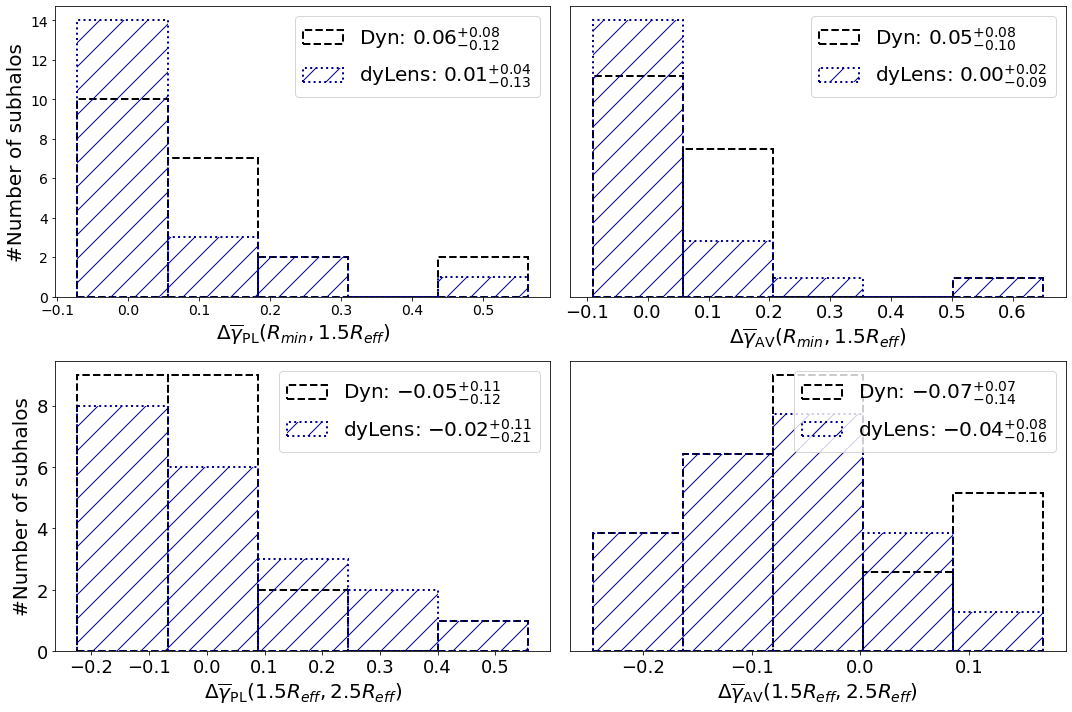

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(221) # PL slope 1
    # JAM
diff1 = (MPL_slope1_jam - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  fill=False,
                 label="Dyn: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)    

    # dyLens+shear
diff3 = (MPL_slope1_shear - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, fill=False, hatch="/",
                 label="dyLens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkblue',linestyle=':',  linewidth=2)
               

plt.legend(fontsize=20)
plt.ylabel("#Number of subhalos", size=20)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(R_{min},1.5R_{eff})$", size=20)
plt.xticks(size=14)
plt.yticks(size=14)


plt.subplot(222) # AV slope 1
       # JAM
diff1 = (MAV_slope1_jam - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False, fill=False,
                 label="Dyn: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

    # dyLens+shear
diff3 = (MAV_slope1_shear - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, fill=False, hatch="/",
                 label="dyLens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkblue',linestyle=':',  linewidth=2)
               

plt.legend(fontsize=20)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(R_{min},1.5R_{eff})$", size=20)
plt.xticks(size=18)
plt.yticks([])

plt.subplot(223) # PL slope 3
    # JAM
diff1 = (MPL_slope2_jam - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  fill=False,
                 label="Dyn: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)


    # dyLens+shear
diff3 = (MPL_slope2_shear - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, fill=False, hatch="/",
                 label="dyLens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkblue',linestyle=':',  linewidth=2)
               

plt.legend(fontsize=20)
plt.ylabel("#Number of subhalos", size=20)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(1.5R_{eff},2.5R_{eff})$", size=20)

plt.xticks(size=18)
plt.yticks(size=18)

plt.subplot(224) # AV slope 2
       # JAM
diff1 = (MAV_slope2_jam - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  fill=False,
                 label="Dyn: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)


    # dyLens+shear
diff3 = (MAV_slope2_shear - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, fill=False, hatch="/",
                 label="dyLens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkblue',linestyle=':',  linewidth=2)
               

plt.legend(fontsize=20)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(1.5R_{eff},2.5R_{eff})$", size=20)
plt.xticks(size=18)
plt.yticks([])



plt.tight_layout()
plt.savefig('/home/carlosmelo/Desktop/plots/slope_distribution.png', dpi=600,  bbox_inches='tight') 

----